In [18]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Import the data
df = pd.read_excel('innercity.xlsx')

In [21]:
# print data summary
df.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,sight,quality,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
count,2.161300e+04,2.161300e+04,21505.000000,21505.000000,21596.000000,2.157100e+04,21556.000000,21612.000000,21612.000000,21612.000000,21613.000000,21613.000000,21613.000000,21447.000000,21584.000000,21584.000000
mean,4.580302e+09,5.401822e+05,3.371355,2.115171,2079.860761,1.510458e+04,0.234366,7.656857,1788.366556,291.522534,84.402258,98077.939805,47.560053,1987.065557,12766.543180,0.196720
std,2.876566e+09,3.673622e+05,0.930289,0.770248,918.496121,4.142362e+04,0.766438,1.175484,828.102535,442.580840,401.679240,53.505026,0.138564,685.519629,27286.987107,0.397528
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,1.000000,290.000000,0.000000,0.000000,98001.000000,47.155900,399.000000,651.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,0.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000,47.471000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,47.571800,1840.000000,7620.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068450e+04,0.000000,8.000000,2210.000000,560.000000,0.000000,98118.000000,47.678000,2360.000000,10087.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,6210.000000,871200.000000,1.000000


In [3]:
# Ignore the rows which has $ as value in any column
df = df[~df.isin(['$']).any(axis=1)]

In [4]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [5]:
# outlier treatment
df = df[df['room_bed'] < 8]
df = df[df['room_bath'] < 5]
df = df[df['living_measure'] < 6000]
df = df[df['lot_measure'] < 100000]
df = df[df['ceil'] < 4]
df = df[df['coast'] < 2]
df = df[df['sight'] < 5]
df = df[df['condition'] < 5]
df = df[df['quality'] < 12]
df = df[df['ceil_measure'] < 6000]
df = df[df['basement'] < 4000]
df = df[df['yr_built'] > 1900]
df = df[df['yr_renovated'] < 2015]
df = df[df['zipcode'] < 98080]
df = df[df['lat'] > 47]
df = df[df['long'] < -120]
df = df[df['living_measure15'] < 6000]
df = df[df['lot_measure15'] < 100000]
df = df[df['total_area'] < 100000]

In [6]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
7,1624059224,20140618T000000,1160000,4.0,3.50,4680.0,9700.0,2,0,0.0,...,1320.0,2005,0,98006,47.5703,-122.165,2800.0,12343.0,1.0,14380
8,5469503280,20140721T000000,449950,4.0,2.50,3100.0,10000.0,2,0,0.0,...,0.0,1978,0,98042,47.3741,-122.15,1850.0,9438.0,1.0,13100
9,2787460430,20141028T000000,299950,2.0,1.75,1460.0,10506.0,1,0,0.0,...,0.0,1983,0,98031,47.4048,-122.178,1460.0,8153.0,0.0,11966


In [7]:
# drop the cid column
df = df.drop(['cid'], axis=1)
df = df.drop(['dayhours'], axis=1)
# Ignore redundant columns
df = df.drop(['basement'], axis=1)
df = df.drop(['yr_renovated'], axis=1)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
var = ['living_measure','lot_measure','ceil_measure','living_measure15','lot_measure15','total_area']
df[var] = scaler.fit_transform(df[var])


In [9]:
# Encode using one hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['room_bed','room_bath','ceil','coast','sight','condition','quality','zipcode']]).toarray())
# df = pd.get_dummies(df, columns=['room_bed','room_bath','ceil','coast','sight','condition','quality','zipcode'])

In [10]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [11]:
# Load Linear Regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [12]:
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
# print the intercept and coefficients
print(lm.intercept_)
print(lm.coef_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

160846889.90433013
[-17476.48960384  54193.1020538   72593.60767738  -2837.47298896
 -55572.65721581 867030.31369208  64201.37042413  30145.93159768
  63894.57329238  59614.61576848  -1975.65794256  -1863.5878446
 640038.55837836  38666.51134954  27607.65086289  -8946.62667065
  41146.10404489   2021.07822695]


,Coefficient
room_bed,-17476.489604
room_bath,54193.102054
living_measure,72593.607677
lot_measure,-2837.472989
ceil,-55572.657216
coast,867030.313692
sight,64201.370424
condition,30145.931598
quality,63894.573292
ceil_measure,59614.615768


In [15]:
# predict the values
y_pred = lm.predict(X_test)

In [16]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean Squared Error: 32329951254.029358
R2 Score: 0.6930009493837079
Coefficient of determination: 0.69


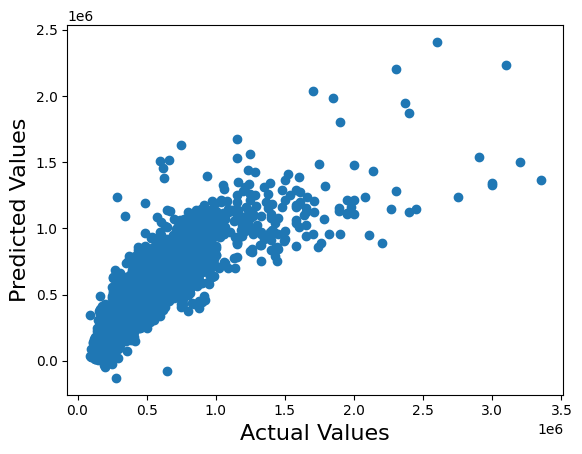

In [17]:
# Plot the predicted values and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)
plt.savefig('actual_vs_predicted.png')

In [33]:
# Combine all figures from ./box-plot into one figure
import matplotlib.image as mpimg
import os
dir = './box-plot/'
fig = plt.figure(figsize=(200, 200))
for i, img in enumerate(os.listdir(dir)):
    # add lable to each image as image name
    ax = fig.add_subplot(5, 5, i+1)
    # increase size of title
    ax.title.set_fontsize(100)
    ax.set_title(img)
    img = mpimg.imread(dir + img)
    plt.imshow(img)
plt.savefig('box-plot.png')